In [22]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import datetime

# Importing libraries for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Importing libraries for data preprocessing and modeling
import scipy
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing libraries for geographical data visualization
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

# Importing library for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Importing library for decision tree and ensemble models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Importing library for IPython configurations
from IPython import get_ipython

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [23]:
# Load the datasets
fifa_data = pd.read_csv('fifa_2023.csv')
fifa_data.head()

,Unnamed: 0,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
0,0,Lionel Messi,98,team-of-the-season,ST,Argentina,Ligue 1 Uber Eats,Paris SG,94,97,96,99,40,79
1,1,Lionel Messi,98,team-of-the-year,RW,Argentina,Ligue 1 Uber Eats,Paris SG,93,98,97,99,40,77
2,2,Pelé,98,icon,CAM,Brazil,Icons,Icons,95,96,93,96,60,76
3,3,Jude Bellingham,97,award-winner,CM,England,Bundesliga,Borussia Dortmund,90,90,94,98,93,94
4,4,Victor Osimhen,97,award-winner,ST,Nigeria,Serie A TIM,Napoli,99,97,82,94,55,95


In [24]:
# show the shape of the dataset
print("Shape of the dataset:") 
print(fifa_data.shape)

Shape of the dataset:
(10000, 14)


In [25]:
# Check for missing values
print("Missing values:")
print(fifa_data.isnull().sum())

Missing values:
Unnamed: 0      0
name            0
rating          0
card_type       0
position        0
nation          0
league        379
team          350
PAC             0
SHO             0
PAS             0
DRI             0
DEF             0
PHY             0
dtype: int64


In [26]:
fifa_data.describe().round(2)

,Unnamed: 0,rating,PAC,SHO,PAS,DRI,DEF,PHY
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4999.50,76.01,74.03,63.63,68.18,72.70,59.08,72.43
std,2886.90,7.45,12.81,15.61,10.72,10.29,17.67,9.36
min,0.00,67.00,29.00,18.00,36.00,35.00,17.00,34.00
25%,2499.75,70.00,67.00,54.00,61.00,67.00,43.00,67.00
50%,4999.50,74.00,75.00,66.00,68.00,72.00,64.00,73.00
75%,7499.25,81.00,83.00,74.00,75.00,79.00,72.00,79.00
max,9999.00,98.00,99.00,99.00,99.00,99.00,97.00,99.00


In [27]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   name        10000 non-null  object
 2   rating      10000 non-null  int64 
 3   card_type   10000 non-null  object
 4   position    10000 non-null  object
 5   nation      10000 non-null  object
 6   league      9621 non-null   object
 7   team        9650 non-null   object
 8   PAC         10000 non-null  int64 
 9   SHO         10000 non-null  int64 
 10  PAS         10000 non-null  int64 
 11  DRI         10000 non-null  int64 
 12  DEF         10000 non-null  int64 
 13  PHY         10000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


## Data Preprocessing

In [28]:
# Get a boolean mask indicating which rows are duplicates
duplicates_mask = fifa_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates_mask.sum()

# Print the result
print(f"There are {num_duplicates} duplicated rows in the FIFA data.")

There are 0 duplicated rows in the FIFA data.


In [29]:
# Drop the 'Unnamed: 0' column from the FIFA data
fifa_data = fifa_data.drop('Unnamed: 0', axis=1)

In [30]:
stat_col = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']
cat_col = ['card_type', 'position', 'nation', 'league', 'team']

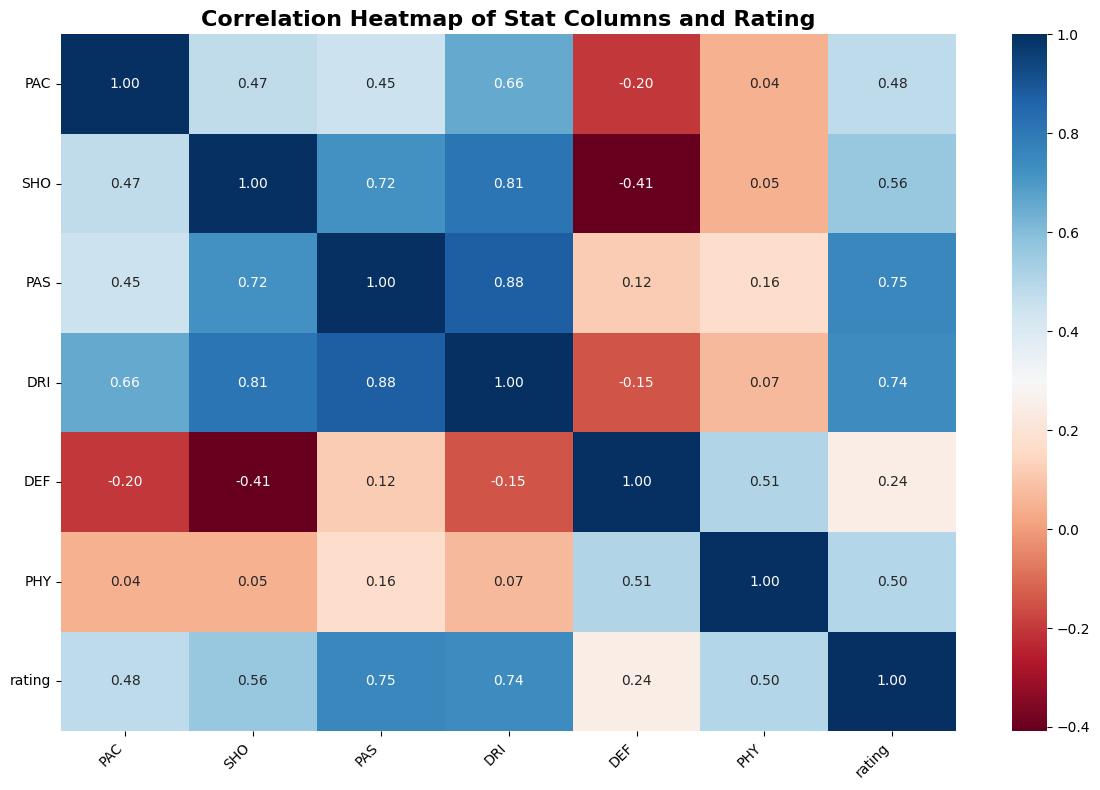

In [31]:
# create heatmap between stat_col and rating
corr = fifa_data[stat_col + ['rating']].corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', annot_kws={"fontsize": 10})
heatmap.set_title('Correlation Heatmap of Stat Columns and Rating', fontsize=16, fontweight='bold')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

In [32]:
# Create a new DataFrame to store the encoded values
cat_encode = fifa_data.copy()

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column
for column in cat_col:
    # Encode the values in the column
    cat_encode[column] = label_encoder.fit_transform(fifa_data[column])

# Print the encoded DataFrame
cat_encode.head()

,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
0,Lionel Messi,98,39,13,4,31,379,94,97,96,99,40,79
1,Lionel Messi,98,42,11,4,31,379,93,98,97,99,40,77
2,Pelé,98,17,0,14,21,271,95,96,93,96,60,76
3,Jude Bellingham,97,1,4,39,5,83,90,90,94,98,93,94
4,Victor Osimhen,97,1,13,90,39,352,99,97,82,94,55,95


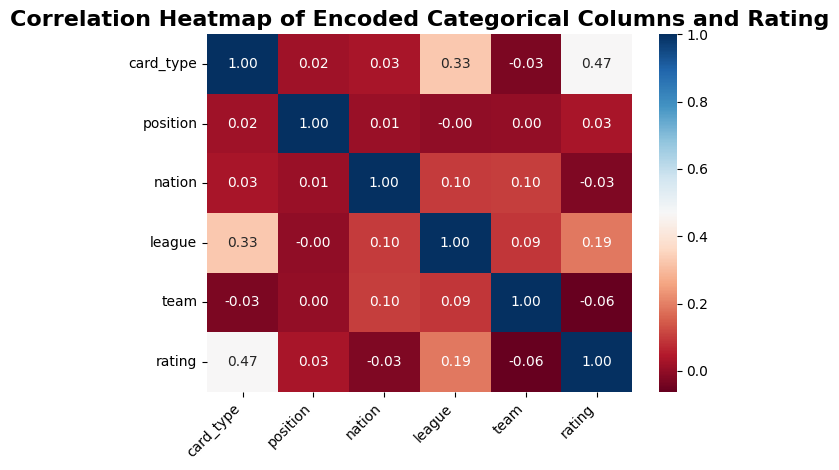

In [33]:
# Create a correlation heatmap of the encoded categorical columns and rating
corr = cat_encode[cat_col + ['rating']].corr()
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', annot_kws={"fontsize": 10})
heatmap.set_title('Correlation Heatmap of Encoded Categorical Columns and Rating', fontsize=16, fontweight='bold')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', fontsize=10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

It shows that the `card_type`, `PAC`, `SHO`, `PAS`, `DRI`, `DEF`, and `PHY` columns affect the rating. Let's drop the rest.

In [34]:
# Drop the columns that are not needed
fifa_data_clear = fifa_data.drop(['name', 'position', 'nation', 'team'], axis=1)
fifa_data_clear.head()

,rating,card_type,league,PAC,SHO,PAS,DRI,DEF,PHY
0,98,team-of-the-season,Ligue 1 Uber Eats,94,97,96,99,40,79
1,98,team-of-the-year,Ligue 1 Uber Eats,93,98,97,99,40,77
2,98,icon,Icons,95,96,93,96,60,76
3,97,award-winner,Bundesliga,90,90,94,98,93,94
4,97,award-winner,Serie A TIM,99,97,82,94,55,95


## Encoding

In [35]:
# Define the one-hot encoder function
def one_hot_encoder(data, feature, keep_first=True):
    # Encode the feature using one-hot encoding
    one_hot_cols = pd.get_dummies(data[feature], drop_first=not keep_first)
    
    # Rename the one-hot encoded columns to include the feature name
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col: f'{feature}_{col}'}, axis=1, inplace=True)
    
    # Concatenate the one-hot encoded columns with the original data and drop the original feature column
    new_data = pd.concat([data, one_hot_cols], axis=1)
    new_data.drop(feature, axis=1, inplace=True)
    
    # Convert True/False values to 1/0
    new_data = new_data.astype(int)
    
    return new_data

In [36]:
# Create a copy of the cleaned DataFrame
new_fifa_data = fifa_data_clear.copy()

# Define the categorical columns to be encoded
cat_cols = ['league', 'card_type']

# Iterate over each categorical column in the DataFrame
for col in cat_cols:
    # Encode the column using one-hot encoding
    encoded_cols = pd.get_dummies(new_fifa_data[col], prefix=col)
    new_fifa_data = pd.concat([new_fifa_data, encoded_cols], axis=1)
    # Drop the original column
    new_fifa_data.drop(col, axis=1, inplace=True)

# Convert boolean values to 1/0
new_fifa_data = new_fifa_data.astype(int)

# Print the first 5 rows of the encoded DataFrame
new_fifa_data.head(5)

,rating,PAC,SHO,PAS,DRI,DEF,PHY,league_1A Pro League,league_3. Liga,league_3F Superliga,...,card_type_world-cup-hero,card_type_world-cup-icon,card_type_world-cup-path-to-glory,card_type_world-cup-phenoms,card_type_world-cup-player,card_type_world-cup-showdown,card_type_world-cup-star,card_type_world-cup-stories,card_type_world-cup-team-of-the-tournament,card_type_x7-morcn
0,98,94,97,96,99,40,79,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98,93,98,97,99,40,77,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,98,95,96,93,96,60,76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,97,90,90,94,98,93,94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,97,99,97,82,94,55,95,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [37]:
# Split the data into training and test sets
X = new_fifa_data.drop('rating', axis=1)
y = new_fifa_data['rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
#PRINTING THE SHAPES OF THE TRAINING AND TEST SETS
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 120)
Shape of X_test: (2000, 120)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


## Model Training

In [39]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
import pandas as pd
import pickle

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.5, 1.0],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 75, 100],
                'max_depth': [None, 5, 10],
                'min_samples_split': [2, 5, 10]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs = RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=10, random_state=0, n_jobs=-1, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'best_model': gs.best_estimator_
        })

    df_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_model'])
    best_model = df_scores.loc[df_scores['best_score'].idxmax(), 'best_model']

    return df_scores, best_model

In [44]:
import warnings
warnings.filterwarnings('ignore')

# Call the function to find the best model
df_score, best_model = find_best_model_using_gridsearchcv(X, y)


# Save the best model using pickle
filename = 'best_model.pkl'  # Choose a filename for the saved model
with open(filename, 'wb') as f:
    pickle.dump(best_model, f)

df_score.drop('best_model', axis=1, inplace=True)


In [48]:
df_score

,model,best_score,best_params
0,linear_regression,0.883147,{'fit_intercept': False}
1,lasso,0.777710,"{'selection': 'random', 'alpha': 0.5}"
2,decision_tree,0.940538,"{'splitter': 'best', 'criterion': 'friedman_mse'}"
3,random_forest,0.972571,"{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}"


## Prediction Test

In [45]:
# Prepare the data for prediction
new_data = fifa_data_clear.sample(10).reset_index(drop=True)  # Replace '5' with the desired number of samples

# Create a DataFrame to store the features
sample_data = pd.DataFrame(columns=new_data.columns)

# Assign the feature values to the corresponding columns in sample_data
for col in new_data.columns:
    sample_data[col] = new_data[col].values
    
# Export the input DataFrame to a CSV file
sample_data.to_csv('sample_data.csv', index=False)
# Display the input DataFrame
sample_data


,rating,card_type,league,PAC,SHO,PAS,DRI,DEF,PHY
0,72,conmebol-libertadores,CONMEBOL Libertadores,79,71,57,67,31,74
1,77,common,Rest of World,68,75,53,71,32,80
2,90,icon,Icons,90,83,88,93,41,67
3,88,uefa-champions-league-motm,Serie A TIM,81,80,85,87,80,83
4,72,common,Serie A TIM,72,26,61,67,68,62
5,80,rare,Premier League,89,77,70,85,46,68
6,79,world-cup-player,World Cup,82,32,61,71,80,81
7,83,world-cup-player,World Cup,72,82,80,86,31,73
8,67,common,Bundesliga 2,63,30,45,42,66,78
9,80,common,Premier League,86,77,75,81,45,64


In [46]:
# Load the saved model
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

model

RandomForestRegressor()

In [47]:
# Load the input data into a DataFrame
sample_data = pd.read_csv('sample_data.csv')

# Perform one-hot encoding on categorical variables for the new data
X_new_encoded = pd.get_dummies(sample_data)

# Ensure consistent feature columns with the training data
df_train_encoded = new_fifa_data.drop(['rating'], axis=1)
X_new_encoded = X_new_encoded.reindex(columns=df_train_encoded.columns, fill_value=0)

# Make predictions
predicted_ratings = best_model.predict(X_new_encoded)

# Create a DataFrame to store the predicted and actual ratings
result_df = pd.DataFrame(columns=['Predicted rating', 'Actual rating'])
result_df['Predicted rating'] = predicted_ratings
result_df['Actual rating'] = sample_data['rating'].values

# Display the result
result_df

,Predicted rating,Actual rating
0,71.36,72
1,76.22,77
2,89.95,90
3,87.54,88
4,71.22,72
5,80.24,80
6,79.26,79
7,83.00,83
8,67.15,67
9,79.73,80


Well, it looks pretty accurate to me.